# Data Agumentation Problem
#### Here you need to compare two models with and without agumentation to see the difference

### Import libraries

In [ ]:
import glob
import cv2
import numpy as np
import random

### Read Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip "/content/drive/My Drive/deep learning/hw3/data_aug.zip"

Archive:  /content/drive/My Drive/deep learning/hw3/data_aug.zip
  inflating: data_aug/cat.7305.jpg   
  inflating: data_aug/dog.12247.jpg  
  inflating: data_aug/dog.306.jpg    
  inflating: data_aug/cat.4344.jpg   
  inflating: data_aug/cat.1807.jpg   
  inflating: data_aug/dog.11833.jpg  
  inflating: data_aug/cat.5077.jpg   
  inflating: data_aug/dog.10221.jpg  
  inflating: data_aug/dog.6503.jpg   
  inflating: data_aug/cat.5009.jpg   
  inflating: data_aug/cat.7738.jpg   
  inflating: data_aug/dog.9719.jpg   
  inflating: data_aug/dog.9374.jpg   
  inflating: data_aug/cat.10172.jpg  
  inflating: data_aug/cat.2482.jpg   
  inflating: data_aug/dog.42.jpg     
  inflating: data_aug/cat.1021.jpg   
  inflating: data_aug/dog.658.jpg    
  inflating: data_aug/dog.1989.jpg   
  inflating: data_aug/dog.6891.jpg   
  inflating: data_aug/dog.301.jpg    
  inflating: data_aug/cat.1666.jpg   
  inflating: data_aug/dog.4439.jpg   
  inflating: data_aug/cat.6706.jpg   
  inflating: data_aug/c

In [ ]:
# First we should read all the images from the provided directory,
# 1. first unzip the .zip file attached with homeworks
# 2. read images from directory
# 3. create labels array
import os 
from PIL import Image


samples = []
labels = []
for image in os.listdir('data_aug'):
    # print(image)
    image_array = Image.open(f"data_aug/{image}").convert("RGB")
    image_array = np.asarray(image_array)
    labels.append(0 if "cat" in image else 1)
    samples.append(image_array)

labels = np.array(labels)  
print(labels)    




[1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1]


### Prepare Dataset

In [ ]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)
########################
samples = np.array(samples) / 255
########################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Resize your images to (28 * 28)

x_train=[]
for image in samples:
  converted_image = cv2.resize(image, (28, 28))
  x_train.append(converted_image)

x_train = np.array(x_train)
print(x_train.shape)


(100, 28, 28, 3)


In [ ]:
# Flatten your dataset images 

length, width, height, channels = x_train.shape

x_train = x_train.flatten().reshape(length, width * height * channels)


In [ ]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.

print(f"x train shape : {x_train.shape}")
print(f"y train shape : {labels.shape}")

x train shape : (100, 2352)
y train shape : (100,)


### Create your Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem

model = Sequential()
model.add(Input(shape=(28 * 28 * 3,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

########################
## PUT YOUR CODE HERE ##
########################

In [ ]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, labels, test_size=0.2, shuffle=True)

In [ ]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# # Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss
from keras.callbacks import EarlyStopping
########################
## PUT YOUR CODE HERE ##
es_acc = EarlyStopping(monitor='val_accuracy', mode='max', patience=10)
es_loss = EarlyStopping(monitor='val_loss', mode='min', patience=10)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, verbose=1, batch_size=16, validation_split=0.2, callbacks=[es_loss, es_acc])

########################
print(history.history)


Epoch 1/30
4/4 [==============================] - 0s 44ms/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.7018 - val_accuracy: 0.3750
Epoch 2/30
4/4 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.3750
Epoch 3/30
4/4 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5156 - val_loss: 0.6962 - val_accuracy: 0.3125
Epoch 4/30
4/4 [==============================] - 0s 8ms/step - loss: 0.7079 - accuracy: 0.5312 - val_loss: 0.6998 - val_accuracy: 0.3750
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 0.6724 - accuracy: 0.6875 - val_loss: 0.6937 - val_accuracy: 0.3750
Epoch 6/30
4/4 [==============================] - 0s 10ms/step - loss: 0.6570 - accuracy: 0.6562 - val_loss: 0.6445 - val_accuracy: 0.6250
Epoch 7/30
4/4 [==============================] - 0s 9ms/step - loss: 0.6427 - accuracy: 0.6562 - val_loss: 0.6733 - val_accuracy: 0.5625
Epoch 8/30
4/4 [================

### Plot results

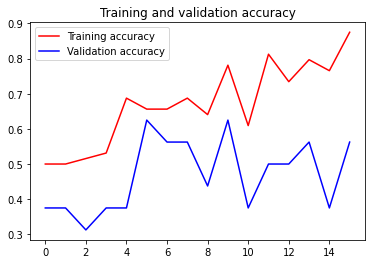

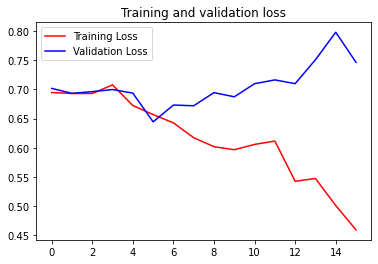

In [ ]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [ ]:
# Evaluate your model on the test data


########################
model.evaluate(X_test, y_test)
########################


1/1 [==============================] - 0s 100ms/step - loss: 0.9067 - accuracy: 0.4500


[0.90667724609375, 0.44999998807907104]

# Compare results with and without using agumentation
### Now we need to do agumentation to create more images to help us overcome underfitting

### Agumentation Methods
Here you should do the agumentation methods to produce more images


In [ ]:
# In this cell you need to implement agumentation methods to increase our data
# NOTICE! Only use libraries in CV2 or others, DON'T use KERAS and Pytorch!


def fill(img, h, w):
    ''' 
    we use this function to resize the shifted image and fill border pixles with different methods
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          h: an integer defining the height of target image
          w: an integer defining the width of target image
    
    output: resized and interpolated image 

    '''
        
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img


def horizontal_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image horizontally with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate horizontally shift to right and left with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''
    
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio) # you can change this
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]

    img = fill(img, h, w) # fill image borders

    return img


In [ ]:
    
def vertical_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image vertically with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate vertically shift to up and down with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''

    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
        
    img = fill(img, h, w)

    return img



In [ ]:
def brightness(img, low, high):

    ''' 
    we use this function to change the brightness of the image with given high and low values
    
    Hint: first convert to HSV color domain, Next make your image brighter or darker then convert back to BGR

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          low:
          high:
    
    output: image with different brightness

    '''

    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return img

In [ ]:

def zoom(img, value):

    ''' 
    we use this function to zoom the image with given value
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the zoom effect
    
    output: zoomed image

    '''
    
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    
    img = fill(img, h, w)

    return img

In [ ]:
def channel_shift(img, value):

    ''' 
    we use this function to shift color channels to play with colors in the image
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the color change effect
    
    output: image with changed colors

    '''
    
    value = int(random.uniform(-value, value))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    
    return img

In [ ]:
def horizontal_flip(img):

    ''' 
    we use this function to flip the image horizontally

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: horizontally fliped image

    '''

    return cv2.flip(img, 1)


In [ ]:
def vertical_flip(img):

    ''' 
    we use this function to flip the image vertically
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: vertically fliped image

    '''
    
    return cv2.flip(img, 0)


### Prepare your dataset

In [ ]:
samples = []
labels = []
for image in os.listdir('data_aug'):
    # print(image)
    image_array = Image.open(f"data_aug/{image}").convert("RGB")
    image_array = np.asarray(image_array)
    labels.append(0 if "cat" in image else 1)
    samples.append(image_array)



In [ ]:
# For each image in our dataset run the previous methods and create a new dataset
new_images = []
new_labels = []
for counter, image in enumerate(samples):

    new_images.append(fill(image,20,20))  

    new_images.append(horizontal_shift(image))

    new_images.append(vertical_shift(image))

    new_images.append(brightness(image.astype("float32"), 0, 1))

    new_images.append(zoom(image, 0.5))

    new_images.append(channel_shift(image, 3))

    new_images.append(horizontal_flip(image))

    new_images.append(vertical_flip(image))

    for _ in range(8):
        new_labels.append(labels[counter])
    

samples = new_images
labels = new_labels


In [ ]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)


samples = np.array(samples) / 255
labels = np.array(labels)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [ ]:
# Resize your images to (28 * 28)

x_train=[]
for image in samples:
  converted_image = cv2.resize(image, (28, 28))
  x_train.append(converted_image)

x_train = np.array(x_train)
print(x_train.shape)

########################
## PUT YOUR CODE HERE ##
########################


(800, 28, 28, 3)


In [ ]:
# Flatten your dataset images 

length, width, height, channels = x_train.shape

x_train = x_train.flatten().reshape(length, width * height * channels)
########################
## PUT YOUR CODE HERE ##
########################


In [ ]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.

print(f"x train shape : {x_train.shape}")
print(f"y train shape : {labels.shape}")
########################
## PUT YOUR CODE HERE ##
########################

x train shape : (800, 2352)
y train shape : (800,)


### Create your model

In [ ]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem


model = Sequential()
model.add(Input(shape=(28 * 28 * 3,)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
########################
## PUT YOUR CODE HERE ##
########################

In [ ]:
# Split your dataset to test and train with the desired implementation
# use sklearn.model_selection.train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, labels, test_size=0.2, shuffle=True)
########################
## PUT YOUR CODE HERE ##
########################

In [ ]:
# Compile your model to introduce loss function optimizer and metrices to monitor accuracy metric and train on the data
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss
from keras.callbacks import EarlyStopping

########################
## PUT YOUR CODE HERE ##
es_acc = EarlyStopping(monitor='val_accuracy', mode='max', patience=7)
es_loss = EarlyStopping(monitor='val_loss', mode='min', patience=7)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, verbose=1, batch_size=16, validation_split=0.2, callbacks=[es_loss, es_acc])

########################
print(history.history)



Epoch 1/30
32/32 [==============================] - 1s 7ms/step - loss: 0.4917 - accuracy: 0.7910 - val_loss: 0.4092 - val_accuracy: 0.8203
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.7969 - val_loss: 0.5376 - val_accuracy: 0.7344
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.8008 - val_loss: 0.4496 - val_accuracy: 0.8047
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.7891 - val_loss: 0.5771 - val_accuracy: 0.6797
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.7988 - val_loss: 0.4135 - val_accuracy: 0.8203
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4123 - accuracy: 0.8262 - val_loss: 0.5372 - val_accuracy: 0.7031
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.7988 - val_loss: 0.5031 - val_accuracy: 0.7656
Epoch 8/30
32/32 [==

### Plot your results

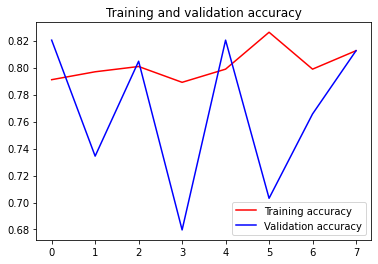

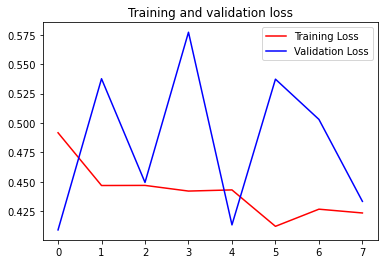

In [ ]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [ ]:
# Evaluate your model on the test data


########################
model.evaluate(X_test, y_test)
########################


5/5 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8250


[0.41089552640914917, 0.824999988079071]

# Compare your results with and without using agumentation to see the difference

## Optional Bonus Activity

In [ ]:
# Optional

# Keras data Augmentation

#use the bellow links

# https://keras.io/guides/keras_cv/custom_image_augmentations/

# https://keras.io/api/preprocessing/image/